Epoch: 0, Loss: 0.2437255546155214, Accuracy: 0.09111666666666667
Epoch: 1, Loss: 0.207764201819415, Accuracy: 0.33948333333333336
Epoch: 2, Loss: 0.17922675532413632, Accuracy: 0.49141666666666667
Epoch: 3, Loss: 0.1574698537417577, Accuracy: 0.6033333333333334
Epoch: 4, Loss: 0.1417259766843527, Accuracy: 0.6463333333333333
Epoch: 5, Loss: 0.12757605036417283, Accuracy: 0.68285
Epoch: 6, Loss: 0.11574667537197351, Accuracy: 0.7094833333333334
Epoch: 7, Loss: 0.10539125224779004, Accuracy: 0.7302833333333333
Epoch: 8, Loss: 0.09630851420222922, Accuracy: 0.7493833333333333
Epoch: 9, Loss: 0.08826453341018366, Accuracy: 0.7681833333333333
Epoch: 10, Loss: 0.08140628484266621, Accuracy: 0.7819166666666667
Epoch: 11, Loss: 0.07471553880696512, Accuracy: 0.79395
Epoch: 12, Loss: 0.06736885966411083, Accuracy: 0.8115833333333333
Epoch: 13, Loss: 0.06021365474131928, Accuracy: 0.8334166666666667
Epoch: 14, Loss: 0.05533930457355845, Accuracy: 0.8505166666666667
Epoch: 15, Loss: 0.0530459715

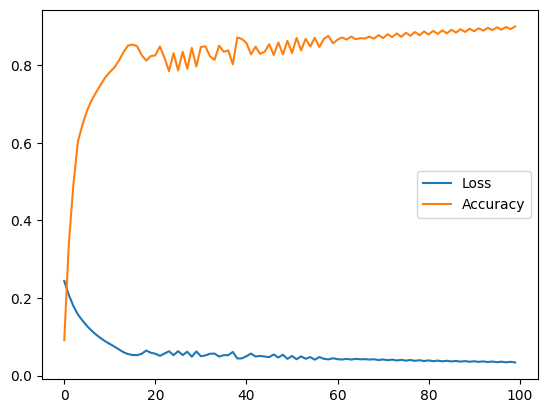

In [6]:
# In this file we do the classic image recognition task on the MNIST dataset


import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical

from neural_network import FC_layer, Fully_Connected_Network

# We define some hyperparameters

Input_size = 784  # Image size
Hidden_size = [512, 512]  # Let's just have 512 neurons in hidden layers
Hidden_count = 2
output_size = 10
learning_rate = 0.001
decay = 0.001
n_epochs = 100


# Load the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()


nn = Fully_Connected_Network(
    input_size=Input_size, output_size=10, hidden_size=[512, 512], hidden_count=2
)

# Flatten the images
X_train = X_train.reshape(X_train.shape[0], Input_size)
X_test = X_test.reshape(X_test.shape[0], Input_size)


# Normalize the images
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

# One hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Train the network
nn.train(X_train, y_train, n_epochs, learning_rate, decay, plot_results=True)

# Test the network
y_predicted = nn.forward_pass(X_test)


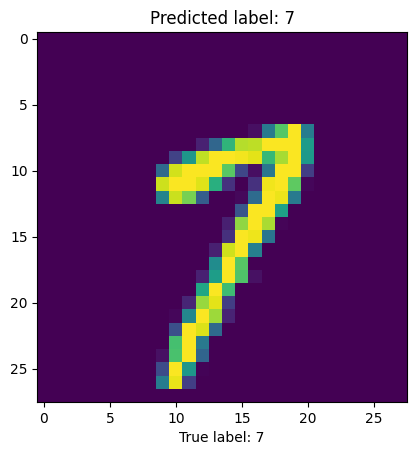

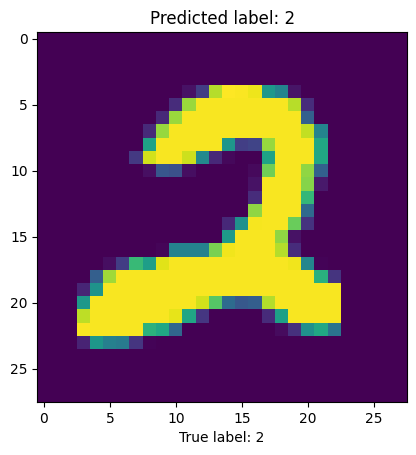

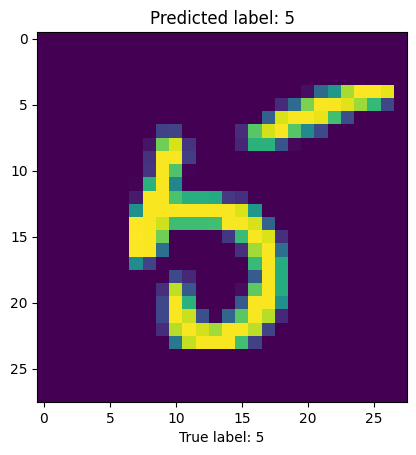

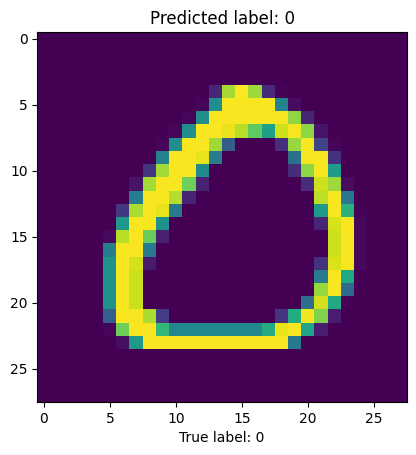

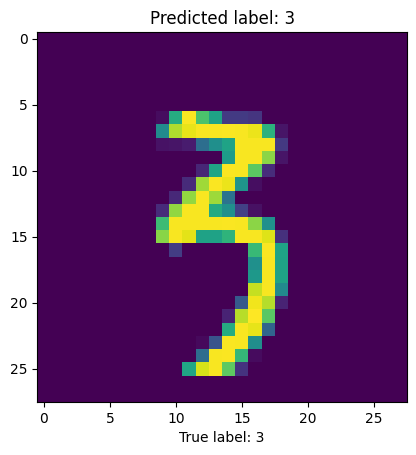

Accuracy: 0.8936


In [10]:
# Take five random images and plot them with their predicted labels as well as true label
for i in range(5):
    index = np.random.randint(0, X_test.shape[0])
    plt.imshow(X_test[index].reshape(28, 28))
    plt.title(f"Predicted label: {np.argmax(y_predicted[index])}")
    plt.xlabel(f"True label: {np.argmax(y_test[index])}")
    plt.show()


# We also print the full accuracy
accuracy = np.mean(np.argmax(y_predicted, axis=1) == np.argmax(y_test, axis=1))
print(f"Accuracy: {accuracy}")